In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [2]:
data = pd.read_csv('/content/Unemployment in India.csv')

In [4]:
#displaying the dataframe
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.shape

(768, 7)

In [6]:
data.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]>

In [7]:
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [9]:
# Check the current column names and count
print(data.columns)

# Update column names to match the number of columns in the dataset
# Adjust the list below to match the exact number of columns
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [12]:
data['Frequency']= data['Frequency'].astype('category')

In [14]:
data['Month'] =  data['Date'].dt.month

In [16]:
data['MonthNumber'] = data['Month'].fillna(0).apply(lambda x: int(x))


In [18]:
data['MonthName'] =  data['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [19]:
data['Region'] = data['Region'].astype('category')

In [20]:
data.drop(columns='Month',inplace=True)
data.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,MonthNumber,MonthName
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


In [21]:
#5-number summary
data.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber
count,740,740.000000,7.400000e+02,740.000000,768.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,6.157552
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,0.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,4.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,6.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,9.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,12.000000
std,NaN,10.721298,8.087988e+06,8.111094,3.394131


In [22]:
round(data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [24]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = data.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

<ipython-input-24-a31a58002326>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regionStats = data.groupby(['Region'])[['Estimated Unemployment Rate',


,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


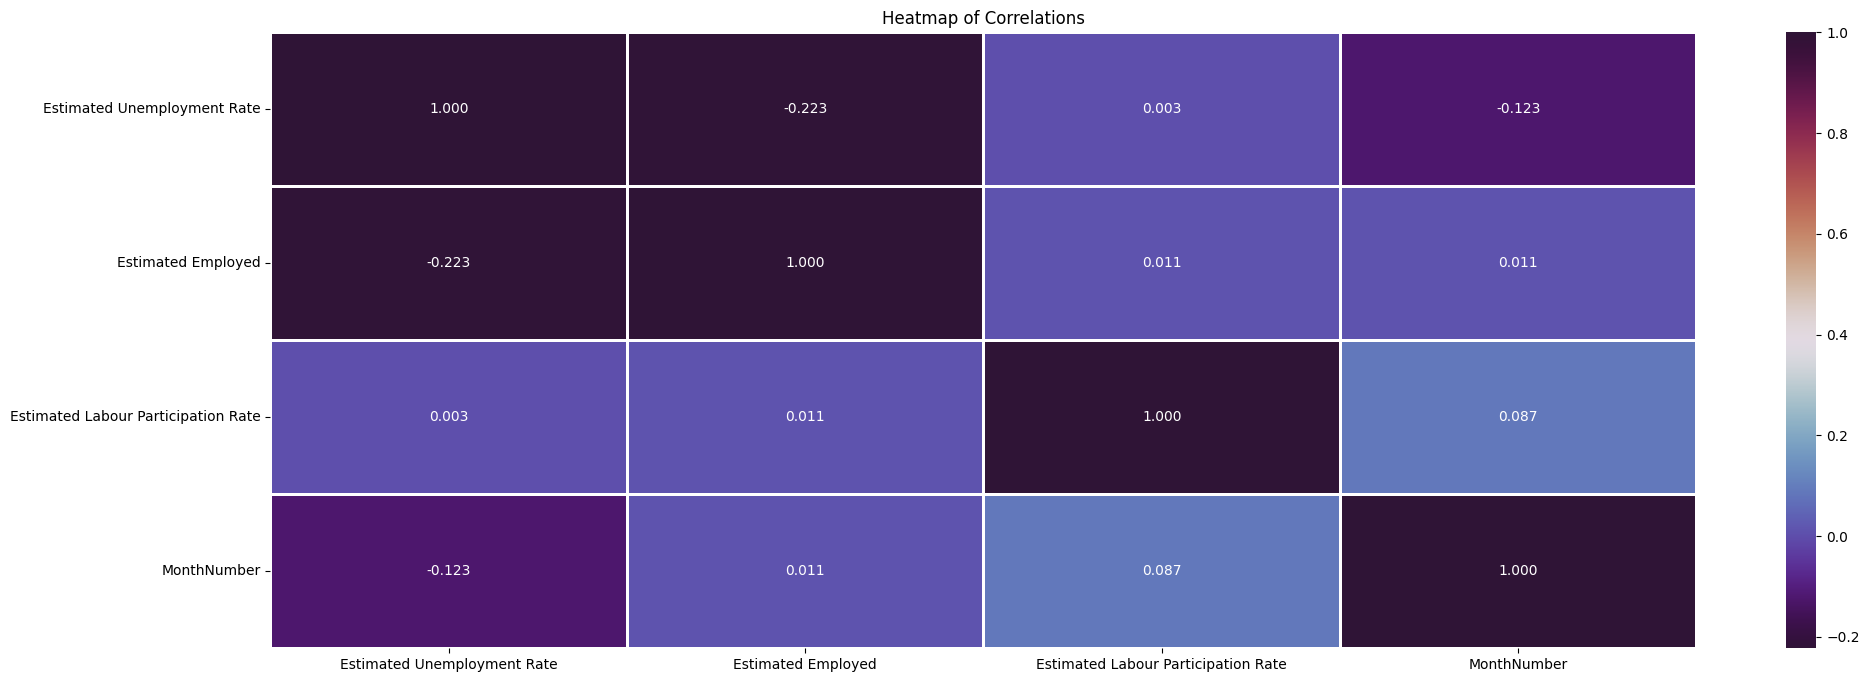

In [28]:
# Constructing a dataframe of all available numerical columns for correlation
heatMap = data[['Estimated Unemployment Rate', 'Estimated Employed',
                'Estimated Labour Participation Rate', 'MonthNumber']]

# Calculating pair-wise correlation values
heatMap = heatMap.corr()

# Plotting the heatmap
plt.figure(figsize=(23, 8))
sns.heatmap(heatMap, annot=True, cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('Heatmap of Correlations')
plt.show()


In [30]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    data,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [31]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(data,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

In [34]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = data[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF,
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate')
fig.show()

In [35]:
fig = px.bar(data,
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

In [37]:
# Creating a new dataframe with 'State-wise' & 'Region-wise' Estimated Unemployment Rate
unempDF = data[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

# Grouping by 'Region' and 'States' and calculating the mean of 'Estimated Unemployment Rate'
unempDF = unempDF.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

# Printing the new dataframe
unempDF.head(4)


<ipython-input-37-7f7245ed5909>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Region,States,Estimated Unemployment Rate
0,Rural,Andhra Pradesh,5.526429
1,Rural,Assam,4.490833
2,Rural,Bihar,16.770000
3,Rural,Chandigarh,NaN


In [39]:
#a sunburst chart (hierarchical chart) for unemployment rate region-wise and state-wise
fig = px.sunburst(unempDF,
                  path=['Region','States'],
                  values='Estimated Unemployment Rate',
                  title= 'unemployment rate in each region and state',
                  height=650)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [43]:
# Adding example longitude and latitude data (replace with actual values)
state_coordinates = {
    'State1': {'longitude': 77.0, 'latitude': 28.7},
    'State2': {'longitude': 72.8, 'latitude': 19.0},
    # Add more states and their respective coordinates
}

# Map coordinates to the data
data['longitude'] = data['States'].map(lambda state: state_coordinates[state]['longitude'] if state in state_coordinates else None)
data['latitude'] = data['States'].map(lambda state: state_coordinates[state]['latitude'] if state in state_coordinates else None)

# Now, creating the scatter geospatial plot
fig = px.scatter_geo(data, 'longitude', 'latitude',
                     color="Region",
                     hover_name="States",
                     size="Estimated Unemployment Rate",
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

# Updating geospatial axes ranges and ocean color
fig.update_geos(lataxis_range=[5, 35],
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

fig.show()


In [45]:
# Filtering dataset between months 4 and 7 (inclusive) - after lockdown
df47 = data[(data['MonthNumber'] >= 4) & (data['MonthNumber'] <= 7)]

# Filtering dataset between months 1 and 4 (inclusive) - before lockdown
df14 = data[(data['MonthNumber'] >= 1) & (data['MonthNumber'] <= 4)]


In [46]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df47g = df47.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df14g = df14.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

#renaming the column values for better understanding
df47g.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df47g.head()

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [47]:
#computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)

In [48]:
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
df47g = df47g.sort_values('% change in unemployment')

In [49]:
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(df47g, x='States',y='% change in unemployment',
             color='% change in unemployment',
             title='% change in Unemployment A/ Lockdown')

fig.show()

In [50]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'

    elif x <= 20:
        #hardImpactedState
        return '🥲😥'

    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'

    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'

    return x

In [51]:
df47g['impactStatus'] = df47g['% change in unemployment'].apply(lambda x:sort_impact(x))

In [52]:
fig = px.bar(df47g,
             y='States',
             x='% change in unemployment',
             color='impactStatus',
             title='Lockdown Impact on Employment in India')

fig.show()